In [1]:
import os
import pandas as pd

In [2]:
weather_data = pd.read_csv('clean_weather_data.csv')
covid_data = pd.read_csv('clean_covid_data.csv')

In [3]:
weather_data = weather_data.drop(weather_data.columns[0],axis=1)
covid_data = covid_data.drop(covid_data.columns[0],axis=1)

In [4]:
covid_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,32,2020-01-22,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
1,71,2020-01-23,Washington,US,1/23/20 17:00,1.0,0.0,0.0
2,120,2020-01-24,Washington,US,1/24/20 17:00,1.0,0.0,0.0
3,162,2020-01-25,Washington,US,1/25/20 17:00,1.0,0.0,0.0
4,163,2020-01-25,Illinois,US,1/25/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
14870,192089,2020-12-31,Virginia,US,2021-04-02 15:13:53,349584.0,5032.0,0.0
14871,192098,2020-12-31,Washington,US,2021-04-02 15:13:53,246752.0,3461.0,0.0
14872,192101,2020-12-31,West Virginia,US,2021-04-02 15:13:53,85334.0,1338.0,0.0
14873,192103,2020-12-31,Wisconsin,US,2021-04-02 15:13:53,520438.0,5242.0,0.0


In [5]:
weather_data

,date,Average Temperature (deg F),location,fids
0,2020-03-10,61.769231,Alabama,FIPS:01
1,2020-03-11,63.076923,Alabama,FIPS:01
2,2020-03-12,67.384615,Alabama,FIPS:01
3,2020-03-13,66.538462,Alabama,FIPS:01
4,2020-03-14,66.153846,Alabama,FIPS:01
...,...,...,...,...
13001,2020-12-25,27.888889,Wyoming,FIPS:56
13002,2020-12-26,29.411765,Wyoming,FIPS:56
13003,2020-12-27,21.461538,Wyoming,FIPS:56
13004,2020-12-30,14.727273,Wyoming,FIPS:56


In [6]:
#We can compare average temperature to confirmed cases, deaths, and recoveries
merged_df1 = covid_data.merge(weather_data,how='inner',left_on=['ObservationDate','Province/State'],right_on=['date','location'])
merged_df1

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Average Temperature (deg F),location,fids
0,163,2020-01-25,Illinois,US,1/25/20 17:00,1.0,0.0,0.0,2020-01-25,33.600000,Illinois,FIPS:17
1,208,2020-01-26,Illinois,US,1/26/20 16:00,1.0,0.0,0.0,2020-01-26,33.580000,Illinois,FIPS:17
2,209,2020-01-26,California,US,1/26/20 16:00,2.0,0.0,0.0,2020-01-26,45.983280,California,FIPS:06
3,256,2020-01-27,Illinois,US,1/27/20 23:59,1.0,0.0,0.0,2020-01-27,30.400000,Illinois,FIPS:17
4,257,2020-01-27,California,US,1/27/20 23:59,2.0,0.0,0.0,2020-01-27,45.399615,California,FIPS:06
...,...,...,...,...,...,...,...,...,...,...,...,...
12870,192089,2020-12-31,Virginia,US,2021-04-02 15:13:53,349584.0,5032.0,0.0,2020-12-31,48.800000,Virginia,FIPS:51
12871,192098,2020-12-31,Washington,US,2021-04-02 15:13:53,246752.0,3461.0,0.0,2020-12-31,37.500000,Washington,FIPS:53
12872,192101,2020-12-31,West Virginia,US,2021-04-02 15:13:53,85334.0,1338.0,0.0,2020-12-31,43.600000,West Virginia,FIPS:54
12873,192103,2020-12-31,Wisconsin,US,2021-04-02 15:13:53,520438.0,5242.0,0.0,2020-12-31,19.240000,Wisconsin,FIPS:55


In [13]:
merged_df = merged_df1[merged_df1['Confirmed']!=0.0]
confirmed = merged_df.groupby(['location','date']).sum().diff()['Confirmed']
confirmed[confirmed<0]=0
confirmed = confirmed.reset_index()
#print(confirmed)
merged_df = merged_df.merge(confirmed,on=['location','date'],how='left').rename(columns={'Confirmed_y':'Confirmed'})
merged_df2 = merged_df1[merged_df1['Deaths']!=0.0]
deaths = merged_df2.groupby(['location','date']).sum().diff()['Deaths']
deaths[deaths<0]=0
deaths = deaths.reset_index()
#print(confirmed)
#print(merged_df)
merged_df = merged_df.merge(deaths,on=['location','date'],how='left').rename(columns={'Deaths_y':'Deaths'})
merged_df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed_x,Deaths_x,Recovered,date,Average Temperature (deg F),location,fids,Confirmed,Deaths
0,163,2020-01-25,Illinois,US,1/25/20 17:00,1.0,0.0,0.0,2020-01-25,33.600000,Illinois,FIPS:17,0.0,NaN
1,208,2020-01-26,Illinois,US,1/26/20 16:00,1.0,0.0,0.0,2020-01-26,33.580000,Illinois,FIPS:17,0.0,NaN
2,209,2020-01-26,California,US,1/26/20 16:00,2.0,0.0,0.0,2020-01-26,45.983280,California,FIPS:06,0.0,NaN
3,256,2020-01-27,Illinois,US,1/27/20 23:59,1.0,0.0,0.0,2020-01-27,30.400000,Illinois,FIPS:17,0.0,NaN
4,257,2020-01-27,California,US,1/27/20 23:59,2.0,0.0,0.0,2020-01-27,45.399615,California,FIPS:06,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12842,192089,2020-12-31,Virginia,US,2021-04-02 15:13:53,349584.0,5032.0,0.0,2020-12-31,48.800000,Virginia,FIPS:51,21591.0,212.0
12843,192098,2020-12-31,Washington,US,2021-04-02 15:13:53,246752.0,3461.0,0.0,2020-12-31,37.500000,Washington,FIPS:53,4422.0,41.0
12844,192101,2020-12-31,West Virginia,US,2021-04-02 15:13:53,85334.0,1338.0,0.0,2020-12-31,43.600000,West Virginia,FIPS:54,1109.0,20.0
12845,192103,2020-12-31,Wisconsin,US,2021-04-02 15:13:53,520438.0,5242.0,0.0,2020-12-31,19.240000,Wisconsin,FIPS:55,4212.0,50.0


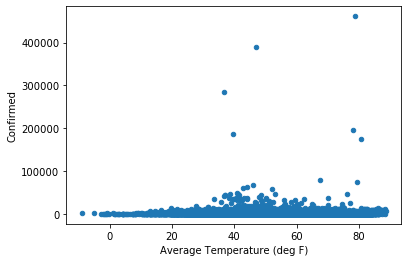

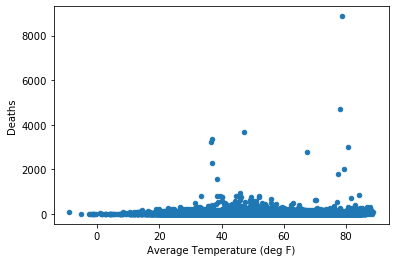

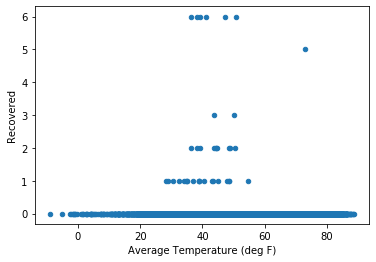

In [22]:
#First plot avg temp on confirmed, deaths, and recoveries

merged_df.plot(y='Confirmed',x='Average Temperature (deg F)',kind='scatter')
merged_df.plot(y='Deaths',x='Average Temperature (deg F)',kind='scatter')
merged_df.plot(y='Recovered',x='Average Temperature (deg F)',kind='scatter')

In [15]:
#We can see a large cluster of data towards the lower end of the confirmed/deaths, 
#which tells us we may want to control for state population in a more advanced analysis

In [16]:
#Then quantify
#We drop consideration of the "recovered" stat since it seems to be inaccurate given the low level of its values 
#compared to confirmed/deaths and the understood recovery rate in other studies

confirmed_df = merged_df[['Confirmed','Average Temperature (deg F)']]
death_df = merged_df[['Deaths','Average Temperature (deg F)']]

#we then calculate corr coeff

print(confirmed_df.corr())
print(death_df.corr())

                             Confirmed  Average Temperature (deg F)
Confirmed                     1.000000                    -0.044851
Average Temperature (deg F)  -0.044851                     1.000000
                               Deaths  Average Temperature (deg F)
Deaths                       1.000000                    -0.023994
Average Temperature (deg F) -0.023994                     1.000000


In [11]:
#We have a slight negative correlation for these covid figures, but this is probably too low to make a significant difference
#We may also want to split this by state or bootstrap (per SIADS 524) to get a better estimate - 
#but the latter is beyond the scope of this course